In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv('diabetes.csv')

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


a) establish a seed, choose a random sample of 25 observations, calculate the sample's mean and maximum glucose readings, then compare the results using charts to the population statistics for the same variable.

In [10]:
# Establish a seed to ensure repeatability
np.random.seed(42)

# Choose 25 observations at random for your sample.
random_sample = data.sample(n=25)

In [11]:
# Determine the sample's mean and highest glucose readings.
sample_avg_glucose = random_sample['Glucose'].mean()
sample_maximum_glucose = random_sample['Glucose'].max()

In [12]:
# Determine the highest and population mean glucose readings.
pop_avg_glucose = data['Glucose'].mean()
pop_maximum_glucose = data['Glucose'].max()

In [13]:
# Show the figures
print("Sample avg Glucose:", sample_avg_glucose)
print("Sample maximum Glucose:", sample_maximum_glucose)
print("\nPop avg Glucose:", pop_avg_glucose)
print("Pop maximum Glucose:", pop_maximum_glucose)

Sample avg Glucose: 116.64
Sample maximum Glucose: 183

Pop avg Glucose: 120.89453125
Pop maximum Glucose: 199


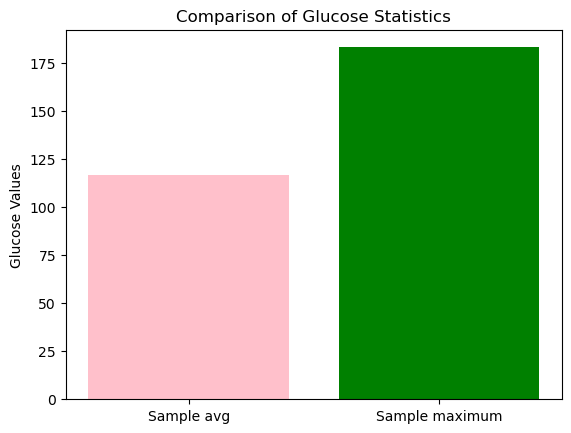

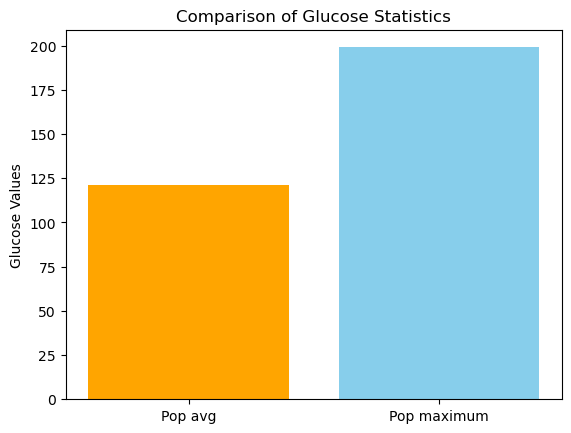

In [14]:
# Make a comparative bar chart.

labels = ['Sample avg', 'Sample maximum']
values = [sample_avg_glucose, sample_maximum_glucose]

plt.bar(labels, values, color=['pink', 'green'])
plt.title('Comparison of Glucose Statistics')
plt.ylabel('Glucose Values')
plt.show()

# Make a comparative bar chart.
labels_1= ['Pop avg', 'Pop maximum']
values_1= [pop_avg_glucose, pop_maximum_glucose]
plt.bar(labels_1, values_1, color=['orange', 'skyblue'])
plt.title('Comparison of Glucose Statistics')
plt.ylabel('Glucose Values')
plt.show()

b) Using charts, compared results of the samples' and the population's BMIs at the 98th percentile.


In [25]:
# Determine the sample's BMI's 98th percentile.
sample_98th_percent_bmi = np.percentile(random_sample['BMI'], 98)

# Determine the population's 98th percentile for BMI.
pop_98th_percent_bmi = np.percentile(data['BMI'], 98)

In [27]:
# Display the percentiles
print("Sample 98th Percent BMI:", sample_98th_percent_bmi)
print("Pop 98th Percent BMI:", pop_98th_percent_bmi)

Sample 98th Percent BMI: 40.248
Pop 98th Percent BMI: 47.52599999999996


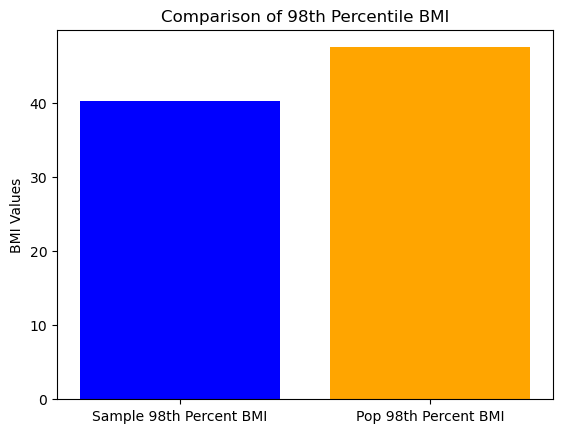

In [28]:
# Create a bar chart for comparison
labels = ['Sample 98th Percent BMI', 'Pop 98th Percent BMI']
values = [sample_98th_percent_bmi, pop_98th_percent_bmi]

plt.bar(labels, values, color=['blue', 'orange'])
plt.title('Comparison of 98th Percentile BMI')
plt.ylabel('BMI Values')
plt.show()

c) Create 500 samples (each with 150 observations) from the population using bootstrap (replace= True). Determine the average, mean, standard deviation, and percentile for blood pressure. Compare these with the population statistics for the same variable. Compare all of these using charts.



In [30]:
# The quantity and dimensions of each bootstrap sample

number_sample = 500
sample_size = 150

In [61]:
# Create empty arrays at first to hold bootstrap data.
bootstrap_avrg = np.zeros(number_sample)
bootstrap_stdrd_devia = np.zeros(number_sample)
bootstrap_prcnt = np.zeros(number_sample)

In [62]:
# Carry out bootstrap sampling

for i in range(number_sample):
   # Create a bootstrap sample by substituting
    bootstrap_sample = np.random.choice(data['BloodPressure'], size=sample_size, replace=True)

   # Determine the bootstrap sample's mean, standard deviation, and 92th percentile.
    bootstrap_avrg[i] = np.mean(bootstrap_sample)
    bootstrap_stdrd_devia[i] = np.std(bootstrap_sample)
    bootstrap_prcnt[i] = np.percentile(bootstrap_sample, 92)

In [63]:
# Compute BloodPressure population statistics.
pop_mean_bp = data['BloodPressure'].mean()
pop_stdrd_devia_bp = data['BloodPressure'].std()
pop_prcnt_92_bp = np.percentile(data['BloodPressure'], 92)

In [64]:
# Show the demographic data
print("Pop Mean BloodPressure:", pop_mean_bp)
print("Pop Standard Deviation BloodPressure:", pop_std_dev_bp)
print("Pop 92th Percent BloodPressure:", pop_percent_92_bp)

Pop Mean BloodPressure: 69.10546875
Pop Standard Deviation BloodPressure: 19.355807170644777
Pop 92th Percent BloodPressure: 88.0


In [65]:
# Determine the bootstrap statistics' mean, standard deviation, and 92th percentile.
bootstrap_mean_avg = np.mean(bootstrap_mean)
bootstrap_mean_stdrd_devia = np.mean(bootstrap_stdrd_devia)
bootstrap_mean_percent_92 = np.mean(bootstrap_percent)

In [66]:
# Present the statistics from the bootstrap.
print("\nBootstrap Mean BloodPressure:", bootstrap_mean_mean)
print("Bootstrap Standard Deviation BloodPressure:", bootstrap_mean_std_dev)
print("Bootstrap 92th Percent BloodPressure:", bootstrap_mean_percent_92)


Bootstrap Mean BloodPressure: 69.0394
Bootstrap Standard Deviation BloodPressure: 19.18930574000917
Bootstrap 92th Percent BloodPressure: 88.46728000000003


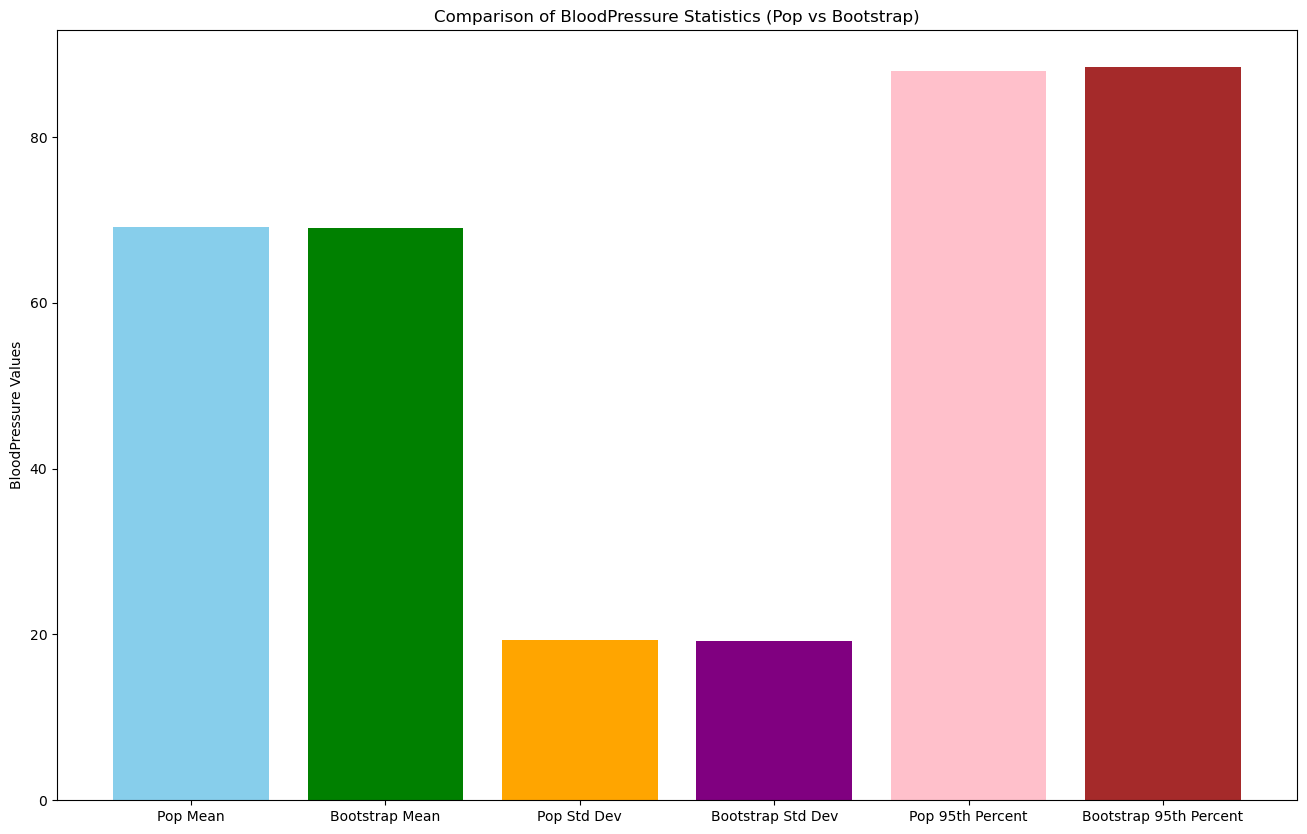

In [67]:
# Create a bar chart for comparison
plt.figure(figsize=(16, 10))
labels = ['Pop Mean', 'Bootstrap Mean', 'Pop Std Dev', 'Bootstrap Std Dev', 'Pop 95th Percent', 'Bootstrap 95th Percent']
values = [pop_mean_bp, bootstrap_mean_mean, pop_std_dev_bp, bootstrap_mean_std_dev, pop_percent_92_bp, bootstrap_mean_percent_92]

plt.bar(labels, values, color=['skyblue', 'green', 'orange', 'purple', 'pink', 'brown'])
plt.title('Comparison of BloodPressure Statistics (Pop vs Bootstrap)')
plt.ylabel('BloodPressure Values')
plt.show()